##### XYZ Co. 2014-2018 sales data to identify key revenue and profit drivers across products, channels, and regions, uncover seasonal trends and outliers, and align performance against budgets. Use these insights to optimize pricing, promotions and market expansions for sustainable growth and reduced concentration risk.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

In [31]:
sheets = pd.read_excel('Regional Sales Dataset.xlsx',sheet_name=None)

In [32]:
sheets.keys()

dict_keys(['Sales Orders', 'Customers', 'Regions', 'State Regions', 'Products', '2017 Budgets'])

In [33]:
# Assigning DataFrame to different sheets
df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2017 Budgets']

In [34]:
df_sheet_names = ['df_sales','df_customers','df_products','df_regions','df_state_reg','df_budgets']
df_sheet_dfs = [df_sales,df_customers,df_products,df_regions,df_state_reg,df_budgets]


for name,df in zip(df_sheet_names , df_sheet_dfs):
    display(Markdown(f"# **{'-'*30} {name} {'-'*30}**"))
    display(df.head(3))
    display(Markdown(f"### {name} shape : {df.shape}"))
    

# **------------------------------ df_sales ------------------------------**

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740


### df_sales shape : (64104, 12)

# **------------------------------ df_customers ------------------------------**

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd


### df_customers shape : (175, 2)

# **------------------------------ df_products ------------------------------**

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3


### df_products shape : (30, 2)

# **------------------------------ df_regions ------------------------------**

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago


### df_regions shape : (994, 15)

# **------------------------------ df_state_reg ------------------------------**

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South


### df_state_reg shape : (49, 3)

# **------------------------------ df_budgets ------------------------------**

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432


### df_budgets shape : (30, 2)

In [35]:
# There is a problem in df_state_reg that columns 
df_state_reg = pd.read_excel('Regional Sales Dataset.xlsx', sheet_name='State Regions', header=1)

In [36]:
df_state_reg.head(3)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West


In [37]:
df_sheet_names = ['df_sales','df_customers','df_products','df_regions','df_state_reg','df_budgets']
df_sheet_dfs = [df_sales,df_customers,df_products,df_regions,df_state_reg,df_budgets]


for name,df in zip(df_sheet_names , df_sheet_dfs):
    display(Markdown(f"### **{'-'*30} {name} {'-'*30}**"))
    print(df.isnull().sum())
    
    

### **------------------------------ df_sales ------------------------------**

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64


### **------------------------------ df_customers ------------------------------**

Customer Index    0
Customer Names    0
dtype: int64


### **------------------------------ df_products ------------------------------**

Index           0
Product Name    0
dtype: int64


### **------------------------------ df_regions ------------------------------**

id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64


### **------------------------------ df_state_reg ------------------------------**

State Code    0
State         0
Region        0
dtype: int64


### **------------------------------ df_budgets ------------------------------**

Product Name    0
2017 Budgets    0
dtype: int64


### Data Cleaning and Data Wrangling

In [38]:
# 🔧 4. DATA WRANGLING & MERGING

# 4.1 Merge with Customers
df = df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)

# 4.2 Merge with Products
df = df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)

# 4.3 Merge with Regions
df = df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)

# 4.4 Merge with State Regions
df = df.merge(
    df_state_reg[["State Code","Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code'
)

# 4.5 Merge with Budgets
df = df.merge(
    df_budgets,
    how='left',
    on='Product Name'
)

# 4.6 Clean up redundant columns
cols_to_drop = [
    'Customer Index', 'Index', 'id', 'State Code',
    # add any auto-generated cols you don't need
]
df = df.drop(columns=cols_to_drop, errors='ignore')

df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [39]:
# To converting into csv
df.to_csv('file.csv',index=False)

In [40]:
# Coverting all columns to lower case for ease of access

df.columns = df.columns.str.lower()

df.columns

Index(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households', 'median_income',
       'land_area', 'water_area', 'time_zone', 'region', '2017 budgets'],
      dtype='object')

In [41]:
# 4.x — DROP UNNECESSARY COLUMNS & RENAME FOR CLARITY (with Region)
# ------------------------------------------------------------------

# 1) List only the columns you want to KEEP, now including the broader 'region'
cols_to_keep = [
    'ordernumber',        # unique order ID
    'orderdate',          # date when the order was placed
    'customer names',     # customer who placed the order
    'channel',            # sales channel (e.g., Wholesale, Distributor)
    'product name',       # product purchased
    'order quantity',     # number of units ordered
    'unit price',         # price per unit
    'line total',         # revenue for this line item (qty × unit_price)
    'total unit cost',    # company’s cost for this line item
    'state_code',         # two-letter state code
    'county',         
    'state',              # full state name
    'region',             # broader U.S. region (e.g., South, West)
    'latitude',           # latitude of delivery city
    'longitude',          # longitude of delivery city
    '2017 budgets'        # budget target for this product in 2017
]

# Subset the DataFrame to only these columns
df = df[cols_to_keep]

# 2) Rename to more Pythonic / self-explanatory names, including region
df = df.rename(columns={
    'ordernumber'      : 'order_number',   # snake_case for consistency
    'orderdate'        : 'order_date',     # date of the order
    'customer names'   : 'customer_name',  # customer who placed it
    'product name'     : 'product_name',   # product sold
    'order quantity'   : 'order_quantity', # units sold
    'unit price'       : 'unit_price',     # price per unit in USD
    'line total'       : 'revenue',        # revenue for the line item
    'total unit cost'  : 'total unit cost',           # cost for the line item
    'state_code'       : 'state',          # two-letter state code
    'state'            : 'state_name',     # full state name
    'region'           : 'us_region',      # broader U.S. region
    'latitude'         : 'lat',            # latitude (float)
    'longitude'        : 'lon',            # longitude (float)
    '2017 budgets'     : 'budget'          # 2017 budget target (float)
})

# Display the cleaned DataFrame structure
df.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state,county,state_name,us_region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_number     64104 non-null  object        
 1   order_date       64104 non-null  datetime64[ns]
 2   customer_name    64104 non-null  object        
 3   channel          64104 non-null  object        
 4   product_name     64104 non-null  object        
 5   order_quantity   64104 non-null  int64         
 6   unit_price       64104 non-null  float64       
 7   revenue          64104 non-null  float64       
 8   total unit cost  64104 non-null  float64       
 9   state            64104 non-null  object        
 10  county           64104 non-null  object        
 11  state_name       64104 non-null  object        
 12  us_region        64104 non-null  object        
 13  lat              64104 non-null  float64       
 14  lon              64104 non-null  float

In [43]:
# As the budget is of only 2017, so i am removing the from Non 2017 data
df.loc[df['order_date'].dt.year != 2017,'budget'] = pd.NA

df[['order_date','product_name','revenue','budget']]

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN
...,...,...,...,...
64099,2018-02-28,Product 26,21788.4,NaN
64100,2018-02-28,Product 21,5185.8,NaN
64101,2018-02-28,Product 13,43483.0,NaN
64102,2018-02-28,Product 20,27717.9,NaN


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_number     64104 non-null  object        
 1   order_date       64104 non-null  datetime64[ns]
 2   customer_name    64104 non-null  object        
 3   channel          64104 non-null  object        
 4   product_name     64104 non-null  object        
 5   order_quantity   64104 non-null  int64         
 6   unit_price       64104 non-null  float64       
 7   revenue          64104 non-null  float64       
 8   total unit cost  64104 non-null  float64       
 9   state            64104 non-null  object        
 10  county           64104 non-null  object        
 11  state_name       64104 non-null  object        
 12  us_region        64104 non-null  object        
 13  lat              64104 non-null  float64       
 14  lon              64104 non-null  float

In [45]:
df.head(3)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state,county,state_name,us_region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN


# *🛠 Feature Engineering*

In [46]:
# Calculating total cost for each line item
df['total_cost'] = df['order_quantity'] * df['total unit cost']

# 2. Calculate profit as revenue minus total_cost
df['profit'] = df['revenue'] - df['total_cost']

# 3. Calculate profit margin as a percentage
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# 4. Extract full month name from order_date for labeling (e.g., 'January', 'February')
df['order_month_name'] = df['order_date'].dt.month_name()

# 5. Extract month number from order_date for correct sorting (1–12)
df['order_month_num'] = df['order_date'].dt.month

In [47]:
df.head(3)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state,...,state_name,us_region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month_name,order_month_num
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,January,1
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,January,1
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,January,1


# **📊 Exploratory Analysis**

## 1. Monthly Sales Trend Over Time

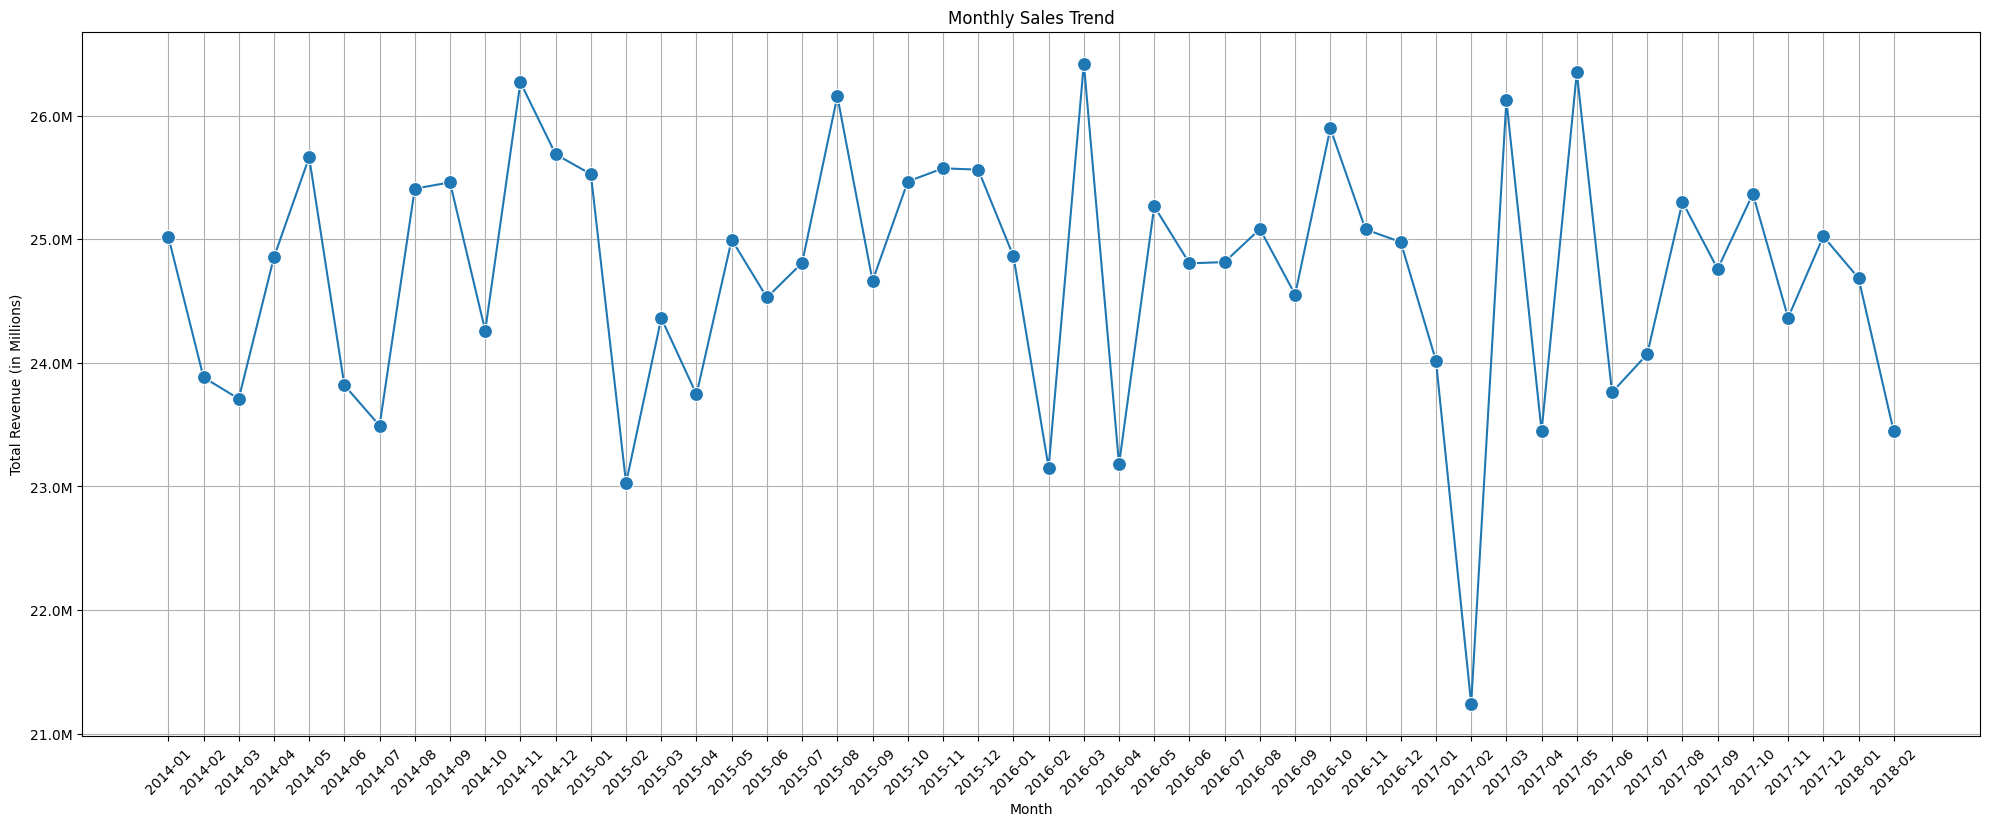

In [48]:
# # Convert order_date to monthly period (e.g., 2022-01, 2022-02)
df['order_month'] = df['order_date'].dt.to_period('M')

# Calculate total revenue for each month
monthly_sales = df.groupby('order_month')['revenue'].sum().reset_index()

# Converting data type to string because can't plot directly
monthly_sales['order_month'] = monthly_sales['order_month'].astype(str)

# Set figure size for clarity
plt.figure(figsize=(20,8))

# Scale y-axis values to millions for readability
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Plot the monthly sales trend with circle markers and navy line
sns.lineplot(data=monthly_sales,x='order_month',y='revenue',marker='o',markersize=10)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (in Millions)')
plt.tight_layout()
plt.grid()
plt.xticks(rotation=45)
plt.show()

### INSIGHTS ---
Sales consistently cycle between \$24 M and \$26 M, with clear peaks in late spring to early summer (May–June) and troughs each January.  

The overall trend remains stable year over year, reflecting a reliable seasonal demand pattern.  

However, the sharp revenue drop in early 2017-02 stands out as an outlier, warranting closer investigation into potential causes such as market disruptions or mistimed promotions.  

## 2. Monthly Sales Trend (All years combined)

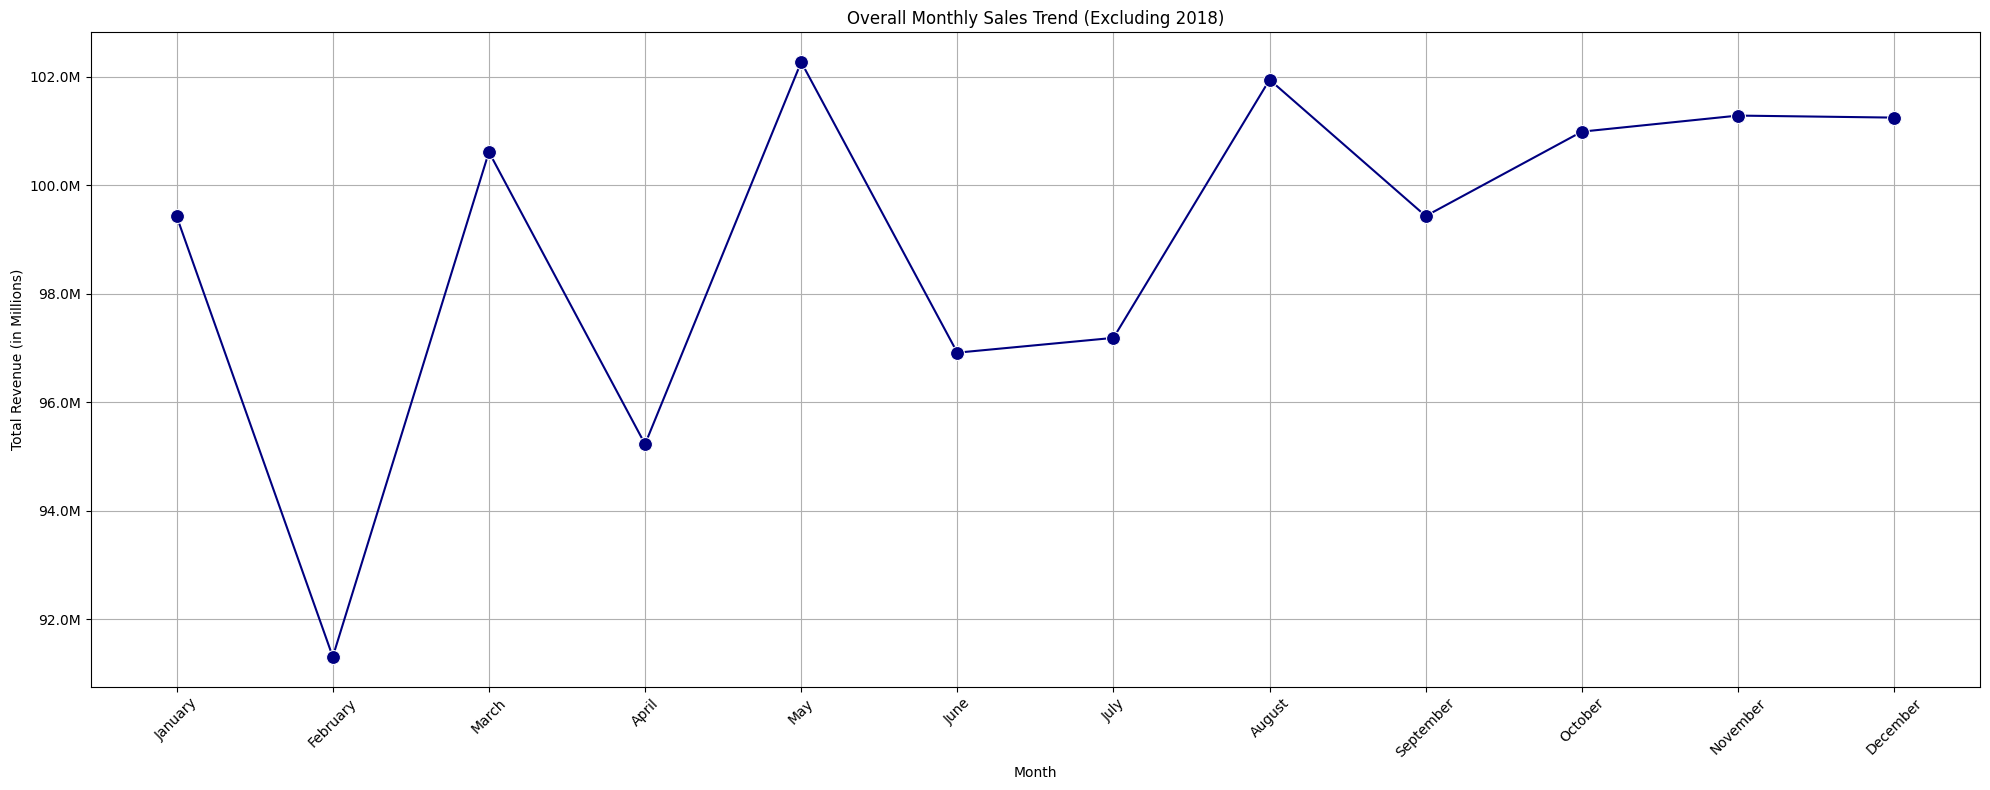

In [49]:
import calendar

# Removing the 2018 because there is no full year data
df_month = df[df['order_date'].dt.year != 2018]
monthly_sales = df_month.groupby('order_month_name')['revenue'].sum().reset_index()

# Suppose df['order_month_name'] holds 'January', ..., 'December'
# Sort month order correctly:
month_order = list(calendar.month_name)[1:]  # ['January', ..., 'December']

monthly_sales['order_month_name'] = pd.Categorical(
    monthly_sales['order_month_name'], categories=month_order, ordered=True)

monthly_sales = monthly_sales.sort_values('order_month_name')

plt.figure(figsize=(20, 8))
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

ax = sns.lineplot(
    data=monthly_sales,
    x='order_month_name',
    y='revenue',
    marker='o',
    color='navy',markersize=10
)

plt.title('Overall Monthly Sales Trend (Excluding 2018)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (in Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()


### INSIGHTS ---

Across all years, January begins strong with roughly \$99 M, followed by a steep decline through April’s low point (≈\$95 M).

Sales rebound in May and August (≈\$102 M) before settling into a plateau of \$99–101 M from September to December.

This pattern reveals a strong post–New Year surge, a spring dip, and a mid–summer bump each calendar year.


## 3. Top 10 Products by Revenue (in Millions) 

C:\Users\yadav\AppData\Local\Temp\ipykernel_9740\2791296454.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(y=top_prod.product_name, x = top_prod.revenue, palette='viridis')


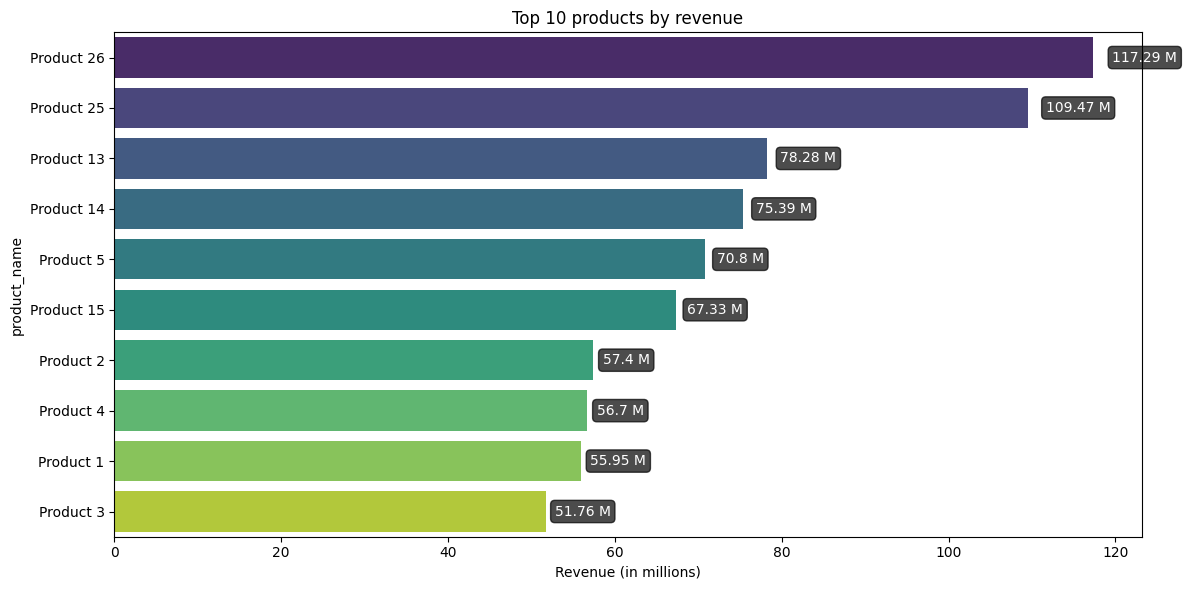

In [50]:
top_prod = df.groupby('product_name')['revenue'].sum()/1_000_000 

top_prod = top_prod.sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(12,6))

# Plot for top products``
plt.subplot(1,1,1)
ax1 = sns.barplot(y=top_prod.product_name, x = top_prod.revenue, palette='viridis')
plt.xlabel('Revenue (in millions)')
plt.title('Top 10 products by revenue')

# Adding values in plot
for bar in ax1.patches:
    ax1.text((bar.get_width() + bar.get_width()*0.02),
             bar.get_y() + bar.get_height()/2,
             f"{round(bar.get_width(),2)} M",
             ha='left',va='center',fontsize=10,color='white',
             bbox=dict(
            facecolor='black',      # All labels get the same yellow shade
            boxstyle='round,pad=0.3',
            alpha=0.7
        ))

plt.tight_layout()
plt.show()

### INSIGHTS ---
Products 26 and 25 pull away at \$118 M and \$110 M, with a sharp drop to \$78 M for Product 13 and a tight mid-pack at \$68–\$75 M.  

The bottom four cluster at \$51–\$57 M, highlighting similar constraints.  

Focus on growth pilots for the mid-tier and efficiency gains for the lower earners to drive significant lifts.  

## 4. Sales by  channel (Pie Chart)

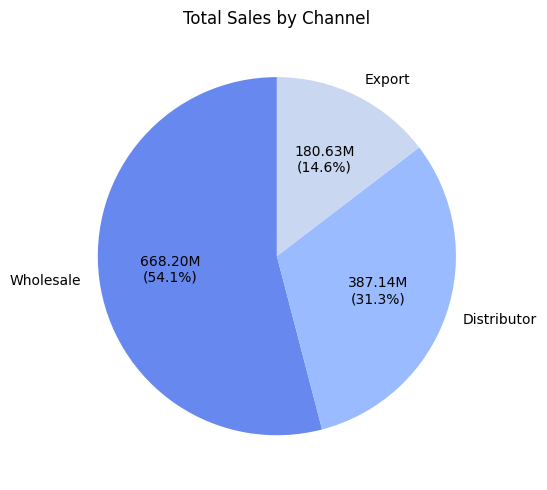

In [51]:
# Group revenue by sales channel and sort descending
chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))

def format_label(pct, allvals):
    absolute = int((pct/100) * sum(allvals))
    # Format as: "value (percent%)"
    return f"{(absolute/1_000_000):.2f}M\n({pct:.1f}%)"

plt.pie(
    chan_sales.values,
    labels=chan_sales.index,
    autopct=lambda pct: format_label(pct, chan_sales.values),
    colors=sns.color_palette('coolwarm'),
    startangle=90     # Optional: Rotates start angle for better layout
)

plt.title('Total Sales by Channel')
plt.tight_layout()
plt.show()


### INSIGHTS ---
Wholesale accounts for 54 % (668.2 M) of sales, with distributors at ~31 % (387.14 M) and exports at ~15 % (180.63 M), underscoring reliance on domestic bulk channels.  

To diversify revenue and mitigate concentration risk, prioritize expanding export initiatives—through targeted overseas marketing and strategic partner relationships.  


## 5. Total Sales by US Region

C:\Users\yadav\AppData\Local\Temp\ipykernel_9740\131326124.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(y=top_region.us_region, x = top_region.revenue, palette='viridis')


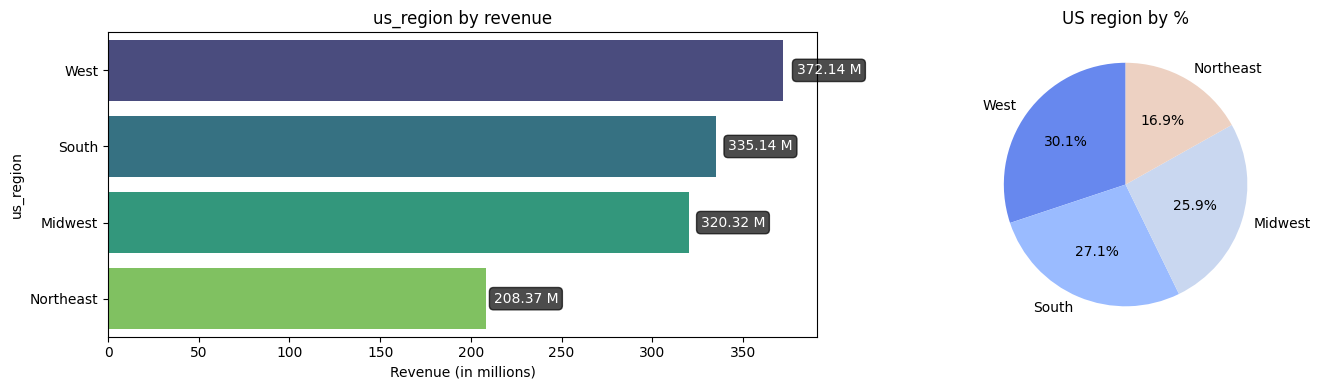

In [52]:
top_region = df.groupby('us_region')['revenue'].sum()/1_000_000 

top_region = top_region.sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(15,4))

# Plot for top products``
plt.subplot(1,2,1)
ax1 = sns.barplot(y=top_region.us_region, x = top_region.revenue, palette='viridis')
plt.xlabel('Revenue (in millions)')
plt.title('us_region by revenue')

# Adding values in plot
for bar in ax1.patches:
    ax1.text((bar.get_width() + bar.get_width()*0.02),
             bar.get_y() + bar.get_height()/2,
             f"{round(bar.get_width(),2)} M",
             ha='left',va='center',fontsize=10,color='white',
             bbox=dict(
            facecolor='black',      # All labels get the same yellow shade
            boxstyle='round,pad=0.3',
            alpha=0.7
        ))

plt.subplot(1,2,2) 
plt.pie(
    top_region.revenue,
    labels=top_region.us_region,
    autopct='%.1f%%',
    colors=sns.color_palette('coolwarm'),
    startangle=90     # Optional: Rotates start angle for better layout
)
plt.title('US region by %')

plt.tight_layout()
plt.show()

### INSIGHTS —  
- **West dominates** with roughly \$372 M in sales (~31 % of total), underscoring its market leadership.  
- **South** contribute over \$335 M (~27 %). 
- **Midwest** contribute over \$320 M (~25 %). 
- **Northeast trails** at about \$208 M (~17 %), signaling room for growth and targeted investment.  
- **Action:** Focus on closing the Northeast gap with local promotions and strategic partnerships, while maintaining national playbook success.  


##  6. Top and Bottom 10 Customers by Revenue

C:\Users\yadav\AppData\Local\Temp\ipykernel_9740\1583245926.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(y=top_customer.customer_name, x = top_customer.revenue, palette='viridis')
C:\Users\yadav\AppData\Local\Temp\ipykernel_9740\1583245926.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(y=bottom_customer.customer_name, x = bottom_customer.revenue, palette='Reds')


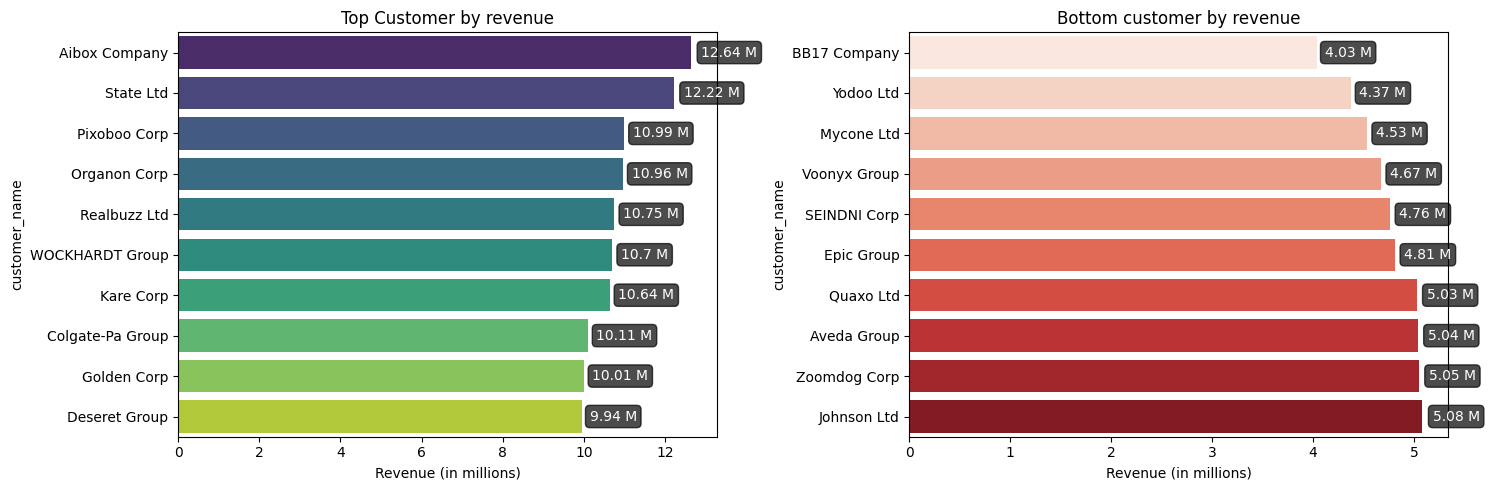

In [53]:
# Calculate total revenue per customer and select top 10
top_customer = df.groupby('customer_name')['revenue'].sum().sort_values(ascending=False).reset_index().head(10)  
top_customer['revenue'] = top_customer['revenue']/1_000_000 #Converting into Millions

# Calculate total revenue per customer and select bottom 10
bottom_customer = df.groupby('customer_name')['revenue'].sum().sort_values(ascending=True).reset_index().head(10)
bottom_customer['revenue'] = bottom_customer['revenue']/1_000_000 #Converting into Millions


# Create a figure with two side-by-side subplots
plt.figure(figsize=(15,5))

# Plot for Top Customer
plt.subplot(1,2,1)
ax1 = sns.barplot(y=top_customer.customer_name, x = top_customer.revenue, palette='viridis')
plt.xlabel('Revenue (in millions)')
plt.title('Top Customer by revenue')

# Adding values in plot
for bar in ax1.patches:
    ax1.text((bar.get_width() + bar.get_width()*0.02),
             bar.get_y() + bar.get_height()/2,
             f"{round(bar.get_width(),2)} M",
             ha='left',va='center',fontsize=10,color='white',
             bbox=dict(
            facecolor='black',      
            boxstyle='round,pad=0.3',
            alpha=0.7
        ))


# Plot for Bottom Customer
plt.subplot(1,2,2)
ax2 = sns.barplot(y=bottom_customer.customer_name, x = bottom_customer.revenue, palette='Reds')
plt.xlabel('Revenue (in millions)')
plt.title('Bottom customer by revenue')

# Adding values in plot
for bar in ax2.patches:
    ax2.text((bar.get_width() + bar.get_width()*0.02),
             bar.get_y() + bar.get_height()/2,
             f"{round(bar.get_width(),2)} M",
             ha='left',va='center',fontsize=10,color='white',
             bbox=dict(
            facecolor='black',      
            boxstyle='round,pad=0.3',
            alpha=0.7
        ))


# Adjust layout to prevent overlap and display both charts
plt.tight_layout()
plt.show()

### INSIGHTS ---
- Aibox Company tops the list with \$12.64 M, followed closely by State Ltd (\$12.22 M), while the 10th-ranked Deseret Group still contributes \$9.9 M—demonstrating a tight \$10–12 M top tier.

- At the bottom, Johnson Ltd leads its group with \$5.08 M, down to BB17 Company at \$4.03

- Action: prioritize retention and upsell for your top ten, and launch targeted growth campaigns to elevate the lower-revenue cohort.


## 7. Total and Bottom State by Revenue 

C:\Users\yadav\AppData\Local\Temp\ipykernel_9740\351286142.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(y=top_state_name.state_name, x = top_state_name.revenue, palette='viridis')
C:\Users\yadav\AppData\Local\Temp\ipykernel_9740\351286142.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(y=bottom_state_name.state_name, x = bottom_state_name.revenue, palette='Reds')


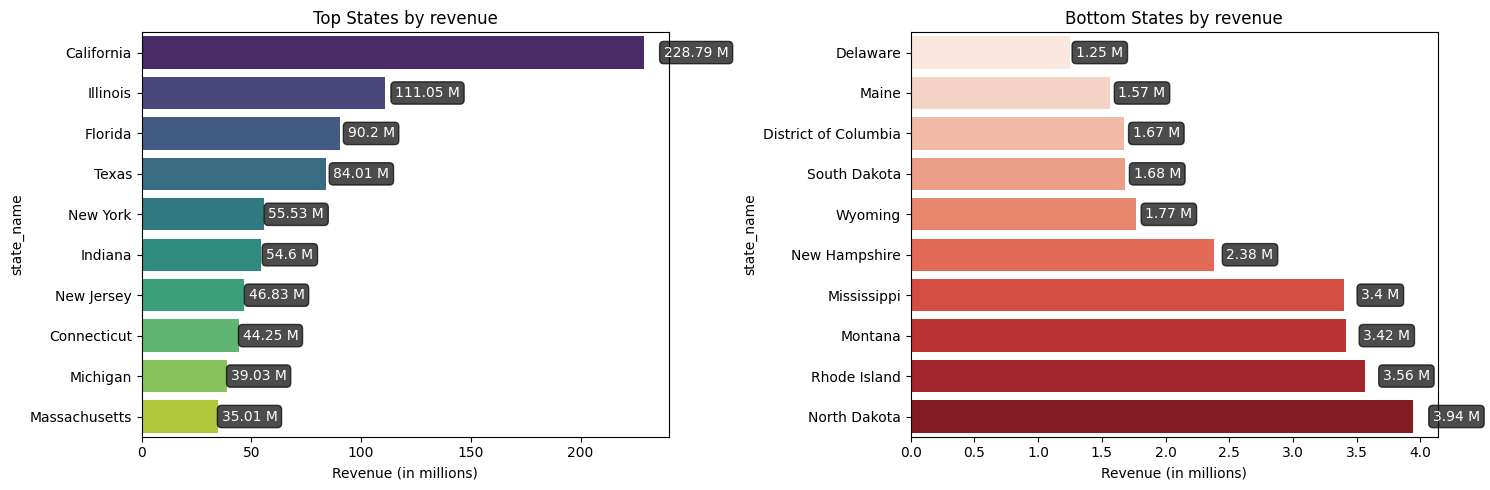

In [54]:
# Calculate total revenue per State and select top 10
top_state_name = df.groupby('state_name')['revenue'].sum().sort_values(ascending=False).reset_index().head(10)  
top_state_name['revenue'] = top_state_name['revenue']/1_000_000 #Converting into Millions

# Calculate total revenue per State and select bottom 10
bottom_state_name = df.groupby('state_name')['revenue'].sum().sort_values(ascending=True).reset_index().head(10)
bottom_state_name['revenue'] = bottom_state_name['revenue']/1_000_000 #Converting into Millions


# Create a figure with two side-by-side subplots
plt.figure(figsize=(15,5))

# Plot for Top States
plt.subplot(1,2,1)
ax1 = sns.barplot(y=top_state_name.state_name, x = top_state_name.revenue, palette='viridis')
plt.xlabel('Revenue (in millions)')
plt.title('Top States by revenue')

# Adding values in plot
for bar in ax1.patches:
    ax1.text((bar.get_width() + bar.get_width()*0.04),
             bar.get_y() + bar.get_height()/2,
             f"{round(bar.get_width(),2)} M",
             ha='left',va='center',fontsize=10,color='white',
             bbox=dict(
            facecolor='black',      
            boxstyle='round,pad=0.3',
            alpha=0.7
        ))


# Plot for Bottom States
plt.subplot(1,2,2)
ax2 = sns.barplot(y=bottom_state_name.state_name, x = bottom_state_name.revenue, palette='Reds')
plt.xlabel('Revenue (in millions)')
plt.title('Bottom States by revenue')

# Adding values in plot
for bar in ax2.patches:
    ax2.text((bar.get_width() + bar.get_width()*0.04),
             bar.get_y() + bar.get_height()/2,
             f"{round(bar.get_width(),2)} M",
             ha='left',va='center',fontsize=10,color='white',
             bbox=dict(
            facecolor='black',      
            boxstyle='round,pad=0.3',
            alpha=0.7
        ))


# Adjust layout to prevent overlap and display both charts
plt.tight_layout()
plt.show()

### INSIGHTS ---
California leads by a wide margin, generating about \$230 M in revenue and 7500 orders—more than twice the next-highest state.  

Illinois, Florida, and Texas form a solid second tier, each posting \$85–110 M in revenue with 3 600–4 600 orders.  

New York and Indiana are mid-pack (≈\$54–55 M, ~2 500 orders), while Connecticut, Michigan, and Massachusetts trail at \$35–44 M with 1 600–2 100 orders.  

The close alignment between revenue and order counts suggests similar average order values across states; to drive growth, focus on increasing order volume in the mid-tier and raising order size in lower-performing regions.  

##  8. Order Value Distribution

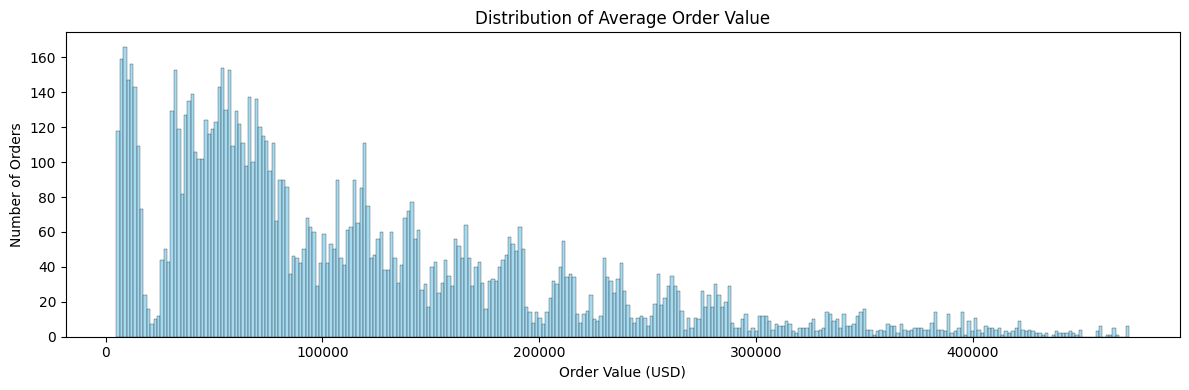

In [73]:
# Calculate the total revenue for each order to get order value
ov = df.groupby('order_number')['revenue'].sum()

# Set the figure size for better visibility
plt.figure(figsize=(12, 4))

# Plot a histogram of order values
sns.histplot(
    ov,
    bins=300,
    color='skyblue',
    edgecolor='black'
)

# Add title and axis labels for context
plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')

plt.tight_layout()
plt.show()

### INSIGHTS ---
The order‐value distribution is heavily right‐skewed, with most orders clustering between $20 K and $120 K and a pronounced mode around $50 K–$60 K.  

A long tail of high-value transactions extends up toward \$400 K–\$500 K, but these large orders represent only a small share of total volume.  

## 9. Profit Margin % vs. Unit Price

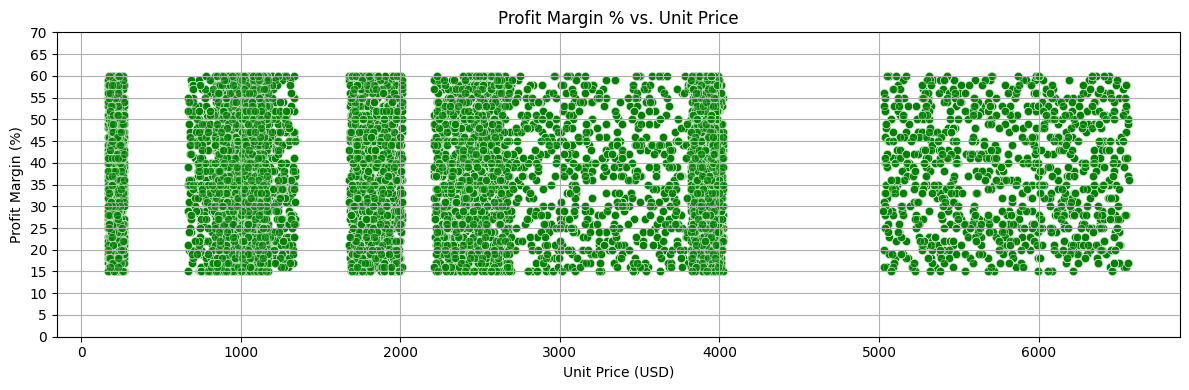

In [83]:
# Calculate profit margin percentage for each record
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# Set the figure size for clarity
plt.figure(figsize=(12,4))

# Plot unit price vs. profit margin percentage
sns.scatterplot(data=df,
    x=df['unit_price'],            # X-axis: unit price in USD
    y=df['profit_margin_pct'],     # Y-axis: profit margin percentage
    alpha=0.6,                  # Transparency level for overlapping points
    color='green'                # Point color
)

# Add title and axis labels
plt.title('Profit Margin % vs. Unit Price')  # Chart title
plt.xlabel('Unit Price (USD)')                # X-axis label
plt.ylabel('Profit Margin (%)')               # Y-axis label
plt.grid()

# Adjust layout to prevent clipping
plt.tight_layout()

ticks = []
for i in range(22):
    val = i * 5
    if val > 70:
        break
    ticks.append(val)
plt.yticks(ticks)  # Set specific tick location


# Display the plot
plt.show()

### INSIGHTS ---

Profit margins are concentrated between ~15% and 60%, with no clear correlation to unit price, which spans from near \$0 to over \$6,500.


##  10. Distribution of unit prices for each product

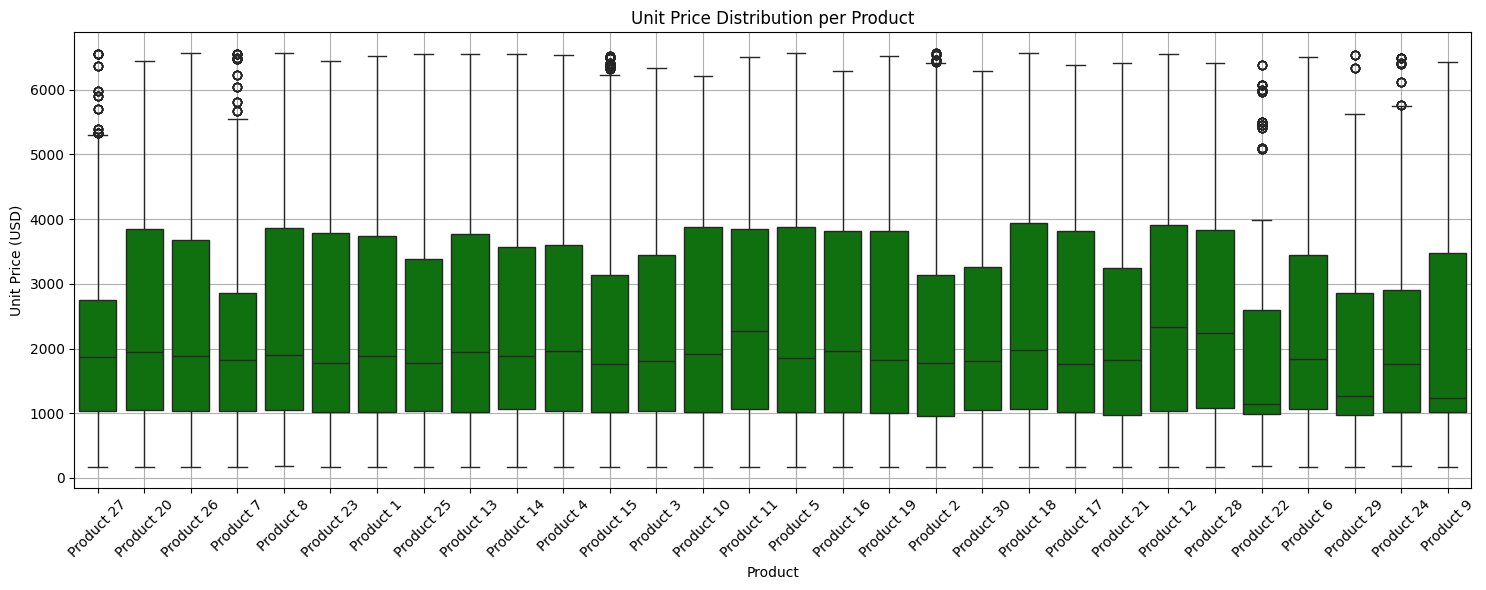

In [103]:
plt.figure(figsize=(15,6))

# Create a boxplot with sorted product names
sns.boxplot(
    data=df,
    x='product_name',
    y='unit_price',
    color='g'
)

plt.title('Unit Price Distribution per Product')
plt.xlabel('Product')
plt.ylabel('Unit Price (USD)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


## 15. Correlation Heatmap of Numeric Features

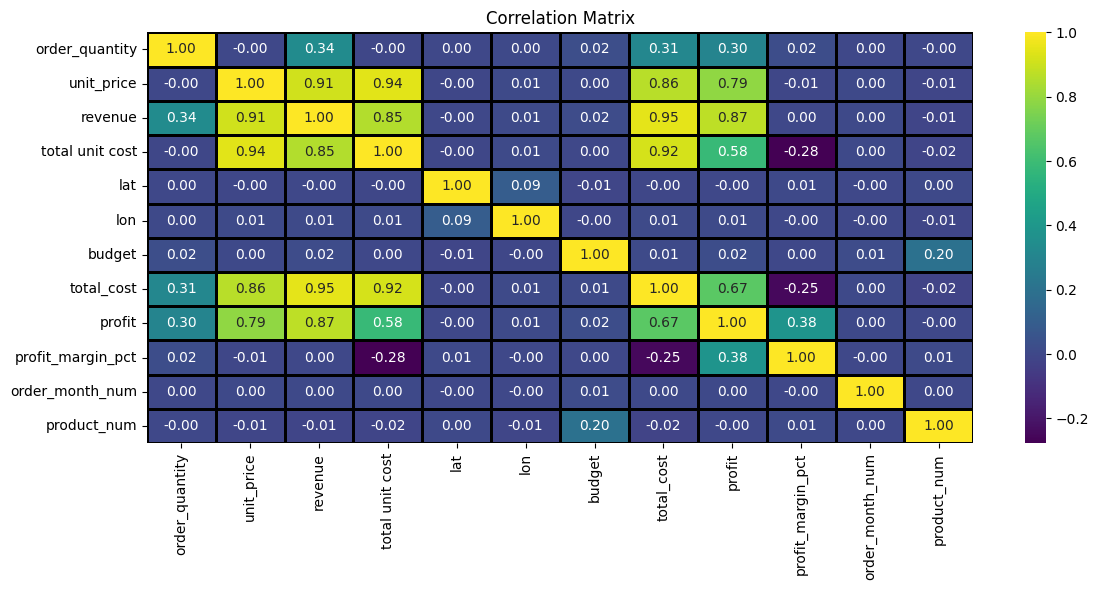

In [146]:
# List numeric columns to include in the correlation calculation
num_cols = df.select_dtypes(include=['int','float']).columns

# Calculate the correlation matrix for these numeric features
corr = df[num_cols].corr()

# Set the figure size for clarity
plt.figure(figsize=(12,6))

# Plot the heatmap with annotations and a viridis colormap
sns.heatmap(
    corr,           # Data: correlation matrix
    annot=True,     # Display the correlation coefficients on the heatmap
    fmt=".2f",      # Format numbers to two decimal places
    cmap='viridis',  # Color palette for the heatmap
    linewidths=2,
    linecolor='black'

)

# Add title for context
plt.title('Correlation Matrix')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the heatmap
plt.show()

### INSIGHTS ---
- **Profit and revenue** are very strongly correlated (0.87), indicating that as sales value increases, profit tends to rise as well.  
- **Unit price** is a key driver: it correlates 0.91 with revenue, 0.79 with profit, and 0.94 with cost—highlighting how pricing decisions ripple through both top‑line and expense figures.  
- **Cost** shows a strong link to revenue (0.85) but a more moderate tie to profit (0.58), underscoring that while higher sales often bring higher expenses, margins can still vary.  
- **Quantity** has virtually no correlation with unit price or cost (≈0.00) and only modest associations with revenue (0.34) and profit (0.30), making volume a secondary factor compared to pricing.  


In [147]:
df.to_csv('Sales_data(EDA Exported).csv',index=False)

In [151]:
! jupyter nbconvert --to html EDA_1.ipynb


[NbConvertApp] Converting notebook EDA_1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 11 image(s).
[NbConvertApp] Writing 1729209 bytes to EDA_1.html
